# Proyek Analisis Data: [Meilia Ildha Anshila Sitorus]
- **Nama:** [Meilia Ildha Anshila Sitorus]
- **Email:** [m322d4kx3096@bangkit.academy]
- **ID Dicoding:** [Meilia Ildha Anshila Sitorus]

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Kapan bike riding mendapat order terbanyak dalam waktu setahun?
- Pertanyaan 2: Bagaimana korelasi antara variabel suhu terhadap variabel total order bike riding?
- Pertanyaan 3: Bagaimana variasi bike riding dari sepanjang hari dan Bagaimana nilai mean dari persewaan bike per-jam?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd
import sqlalchemy as sqla
import scipy
import matplotlib
import seaborn as sns

## Data Wrangling

### Gathering Data

In [ ]:
df_day = pd.read_csv("/content/day.csv")
df_day.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
df_hour = pd.read_csv("/content/hour.csv")
df_hour.head(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [ ]:
#Memberikan informasi terkait data hari
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [ ]:
#Memberikan informasi terkait data jam
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [ ]:
#Memberikan deskripsi terkait data hari
df_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [ ]:
#Memberikan deskripsi terkait data hari
df_hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Assessing Data

In [ ]:
df_day.duplicated().sum()

0

######Tidak terdapat data duplikat pada data hari

In [ ]:
df_hour.duplicated().sum()

0

#####Tidak terdapat data duplikat pada data jam

In [ ]:
df_day.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

#####Tidak terdapat data kosong atau missing value

In [ ]:
df_hour.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

#####Tidak terdapat data kosong atau missing value

In [ ]:
df_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [ ]:
df_hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [ ]:
df_day['dteday'] = pd.to_datetime(df_day['dteday'])
df_day['season'] = df_day.season.astype('category')
df_day['mnth'] = df_day.mnth.astype('category')
df_day['holiday'] = df_day.holiday.astype('category')
df_day['weekday'] = df_day.weekday.astype('category')
df_day['workingday'] = df_day.workingday.astype('category')
df_day['weathersit'] = df_day.weathersit.astype('category')

In [ ]:
df_hour['dteday'] = pd.to_datetime(df_hour['dteday'])
df_hour['season'] = df_hour.season.astype('category')
df_hour['mnth'] = df_hour.mnth.astype('category')
df_hour['holiday'] = df_hour.holiday.astype('category')
df_hour['weekday'] = df_hour.weekday.astype('category')
df_hour['workingday'] = df_hour.workingday.astype('category')
df_hour['weathersit'] = df_hour.weathersit.astype('category')

In [ ]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    category      
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    category      
 5   holiday     731 non-null    category      
 6   weekday     731 non-null    category      
 7   workingday  731 non-null    category      
 8   weathersit  731 non-null    category      
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: category(6), datetime64

In [ ]:
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  category      
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  category      
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  category      
 7   weekday     17379 non-null  category      
 8   workingday  17379 non-null  category      
 9   weathersit  17379 non-null  category      
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [ ]:
df_BikeSharing = df_hour.merge(df_day, on='dteday', how='inner', suffixes=('_hour', '_day'))

df_BikeSharing.head()

,instant_hour,dteday,season_hour,yr_hour,mnth_hour,hr,holiday_hour,weekday_hour,workingday_hour,weathersit_hour,...,weekday_day,workingday_day,weathersit_day,temp_day,atemp_day,hum_day,windspeed_day,casual_day,registered_day,cnt_day
0,1,2011-01-01,1,0,1,0,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-01,1,0,1,1,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2,3,2011-01-01,1,0,1,2,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
3,4,2011-01-01,1,0,1,3,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
4,5,2011-01-01,1,0,1,4,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985


In [ ]:
#Konversi Nilai
# Season: 1:Winter, 2:Spring, 3:Summer, 4:Fall
df_day.season.replace((1,2,3,4), ('Winter','Spring','Summer','Fall'), inplace=True)

# Year: 0:2011, 1:2012
df_day.yr.replace((0,1), (2011,2012), inplace=True)

# Month:  1:Jan, 2:Feb, 3:Mar, 4:Apr, 5:May, 6:Jun, 7:Jul, 8:Aug, 9:Sep, 10:Oct, 11:Nov, 12:Dec
df_day.mnth.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace=True)

# Weathersit: 1:Clear, 2:Misty, 3:Light_RainSnow 4:Heavy_RainSnow
df_day.weathersit.replace((1,2,3,4), ('Clear','Misty','Light_RainSnow','Heavy_RainSnow'), inplace=True)

# Weekday: 0:Sun, 1:Mon, 2:Tue, 3:Wed, 4:Thu, 5:Fri, 6:Sat
df_day.weekday.replace((0,1,2,3,4,5,6), ('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'), inplace=True)

# Workingday: 0:No, 1:Yes
df_day.workingday.replace((0,1), ('No', 'Yes'), inplace=True)

### Cleaning Data

In [ ]:
# Semua tipe data tidak ada yang bermasalah
#Drop kolom yang tidak digunakan dalam data
df_day1 = df_day.drop("instant", axis=1)
df_day1.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,Winter,2011,Jan,0,Saturday,No,Misty,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,Winter,2011,Jan,0,Sunday,No,Misty,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,Winter,2011,Jan,0,Monday,Yes,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,Winter,2011,Jan,0,Tuesday,Yes,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,Winter,2011,Jan,0,Wednesday,Yes,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
df_day1.rename(columns={
    "dteday" : "Date",
    "yr" : "Year",
    "mnth" : "Month",
    "weathersit" : "Weather",
    "hum" : "Humiidity",
    "temp" : "Temperature",
    "atemp" : "Atemp",
    "windspeed" : "Windspeed",
    "season" : "Season",
    "holiday" : "Holiday",
    "weekday" : "Weekday",
    "casual" : "Casual",
    "registered" : "Registered",
    "cnt" : "Sum_count"}, inplace=True
)

In [ ]:
df_day1['Temperature'] = df_day1['Temperature']*41
df_day1['Atemp'] = df_day1['Atemp']*50
df_day1['Humiidity'] = df_day1['Humiidity']*100
df_day1['Windspeed'] = df_day1['Windspeed']*67

In [ ]:
df_day1.head(3)

,Date,Season,Year,Month,Holiday,Weekday,workingday,Weather,Temperature,Atemp,Humiidity,Windspeed,Casual,Registered,Sum_count
0,2011-01-01,Winter,2011,Jan,0,Saturday,No,Misty,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2011-01-02,Winter,2011,Jan,0,Sunday,No,Misty,14.902598,17.68695,69.6087,16.652113,131,670,801
2,2011-01-03,Winter,2011,Jan,0,Monday,Yes,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349


## Exploratory Data Analysis (EDA)

### Explore ...

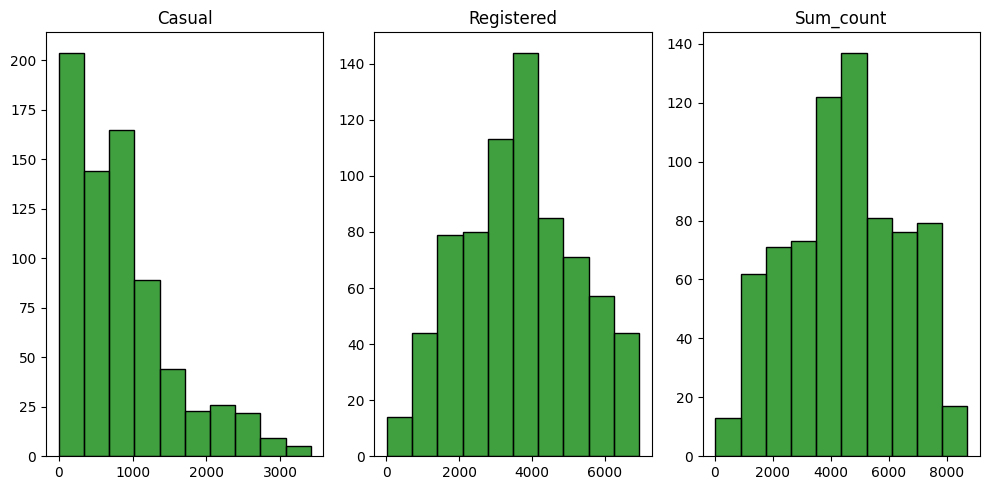

In [ ]:
#Histogram
columns = ['Casual', 'Registered', 'Sum_count']

fig, ax = plt.subplots(1, 3, figsize=(10,5))

for i, ax in enumerate(ax):
    sns.histplot(x=df_day1[columns[i]], ax=ax, bins=10, color='green')
    ax.set_title(columns[i])
    ax.set_xlabel("")
    ax.set_ylabel("")

plt.tight_layout()
plt.show()

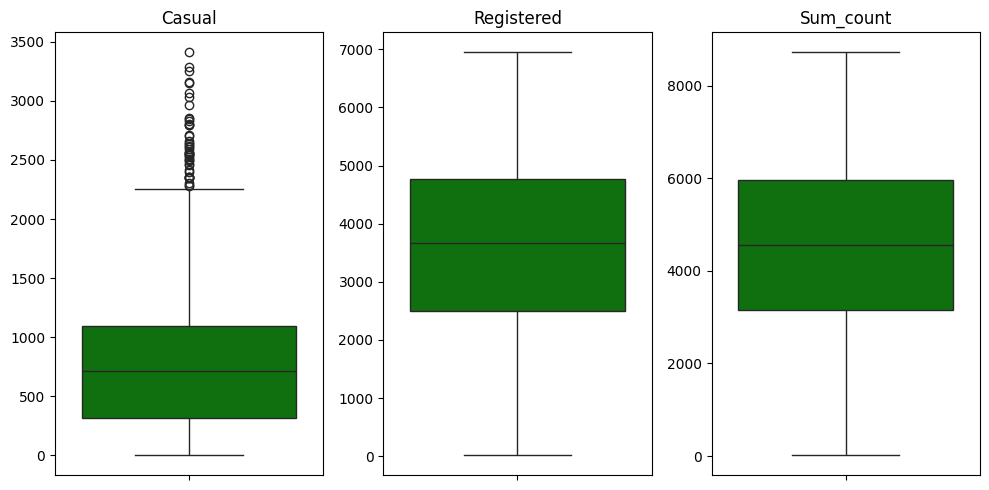

In [ ]:
#Boxplot
fig, ax = plt.subplots(1, 3, figsize=(10,5))

for i, ax in enumerate(ax):
    sns.boxplot(y=df_day1[columns[i]], ax=ax, color='green')
    ax.set_title(columns[i])
    ax.set_xlabel("")
    ax.set_ylabel("")

plt.tight_layout()
plt.show()

<ipython-input-236-24ef6f5c25a6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
<ipython-input-236-24ef6f5c25a6>:2: UserWarning: 
The palette list has fewer values (2) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(


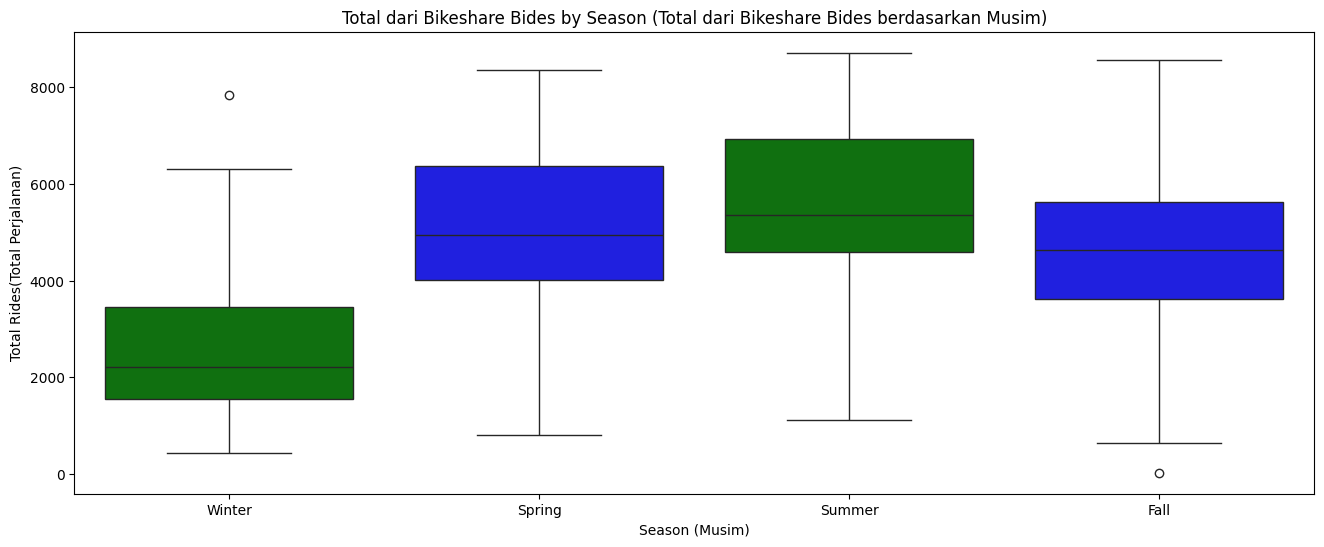

In [ ]:
#Boxplot
plt.figure(figsize=(16,6))
sns.boxplot(
    x="Season",
    y="Sum_count",
    data=df_day1,
    palette=["green", "blue"]
)
plt.xlabel("Season (Musim)")
plt.ylabel("Total Rides(Total Perjalanan)")
plt.title("Total dari Bikeshare Bides by Season (Total dari Bikeshare Bides berdasarkan Musim)")
plt.show()

<ipython-input-237-9dd2d00cd423>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
<ipython-input-237-9dd2d00cd423>:2: UserWarning: 
The palette list has fewer values (2) than needed (12) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(


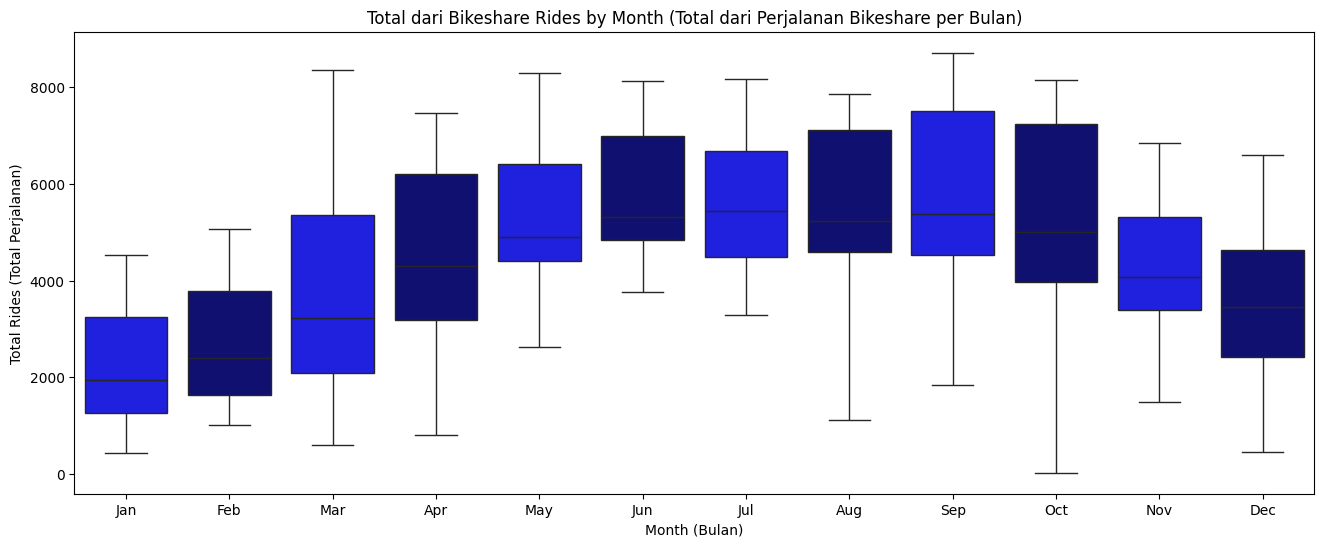

In [ ]:
#Boxplot
plt.figure(figsize=(16,6))
sns.boxplot(
    x="Month",
    y="Sum_count",
    data=df_day1,
    palette=["blue", "navy"]
)
plt.xlabel("Month (Bulan)")
plt.ylabel("Total Rides (Total Perjalanan)")
plt.title("Total dari Bikeshare Rides by Month (Total dari Perjalanan Bikeshare per Bulan)")
plt.show()

## Visualization & Explanatory Analysis

### Pertanyaan 1: Kapan bike riding mendapat order terbanyak dalam waktu setahun?

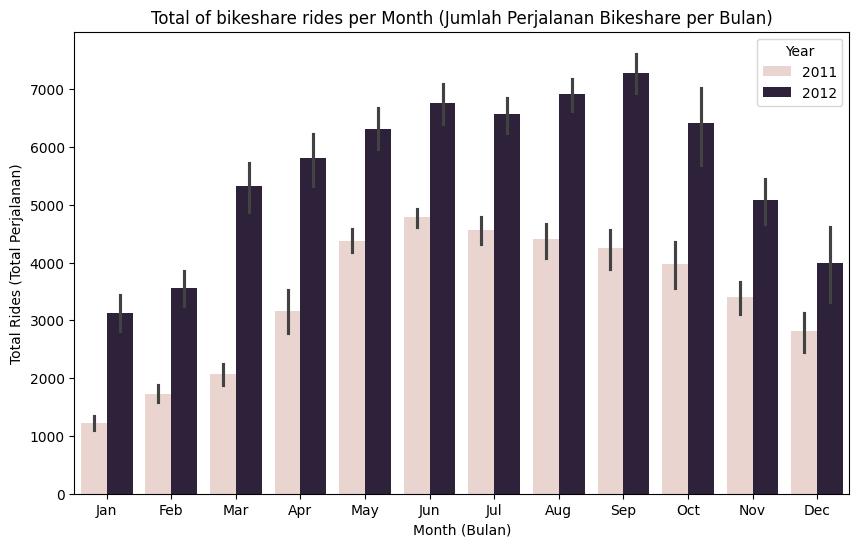

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x='Month', y='Sum_count', data=df_day1, hue='Year')
plt.xlabel("Month (Bulan)")
plt.ylabel("Total Rides (Total Perjalanan)")
plt.title("Total of bikeshare rides per Month (Jumlah Perjalanan Bikeshare per Bulan)")
plt.show()

#Keterangan:
- Berdasarkan hasil output di atas maka dapat dilihat bahwa pada tahun 2011 jumlah permintaan akan bikesharing memiliki jumlah permintaan tertinggi terjadi pada bulan Juni.
- Berdasarkan hasil output di atas maka dapat dilihat bahwa pada tahun 2012 jumlah permintaan terhadap bikesharing memiliki jumlah permintaan tertinggi terjadi pada bulan September.


### Pertanyaan 2: Bagaimana korelasi antara variabel suhu terhadap variabel total order bike riding?

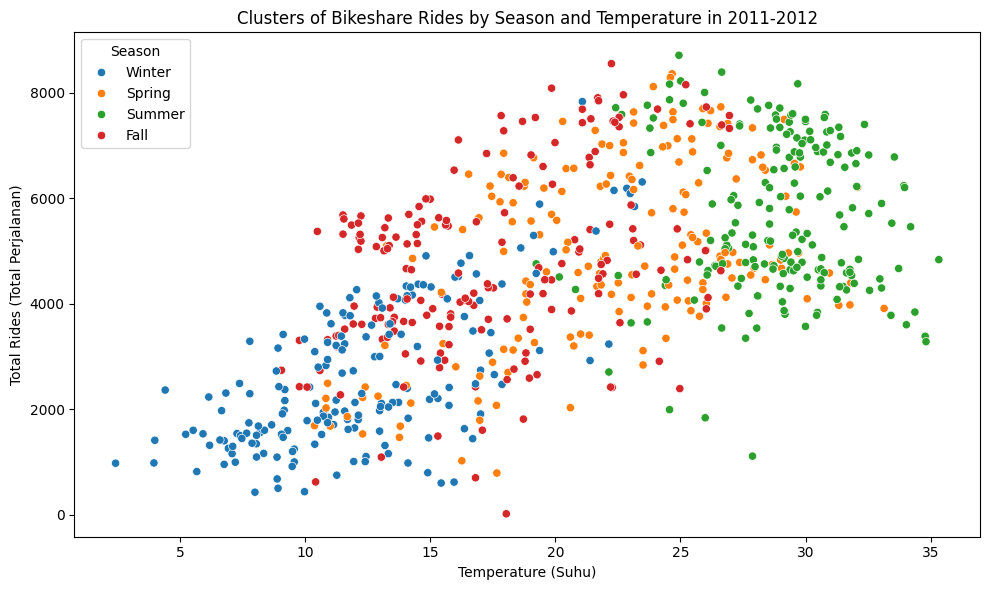

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Temperature', y='Sum_count', data=df_day1, hue='Season')
plt.xlabel("Temperature (Suhu)")
plt.ylabel("Total Rides (Total Perjalanan)")
plt.title("Clusters of Bikeshare Rides by Season and Temperature in 2011-2012")
plt.tight_layout()
plt.show()

#Keterangan:
- Berdasarkan hasil output di atas maka dapat dilihat bahwa pada musim winter order bikesharing memiliki nilai minimum.
- Berdasarkan hasil output di atas maka dapat dilihat bahwa dengan meningkatnya temperatur maka permintaan bikesharing semakin meningkat. - Berdasarkan hasil output di atas maka dapat dilihat bahwa pada musim summer permintaan terhadap bikesharing memiliki nilai tertinggi.
- Berdasarkan hasil output di atas maka dapat dilihat bahwa permintaan terhadap bikesharing memiliki permintaan terbanyak pada rentang suhu 20-30 derajat Celcius atau pada periode summer dan fall.

###Pertanyaan 3: Bagaimana nilai mean dari persewaan bike per-jam?

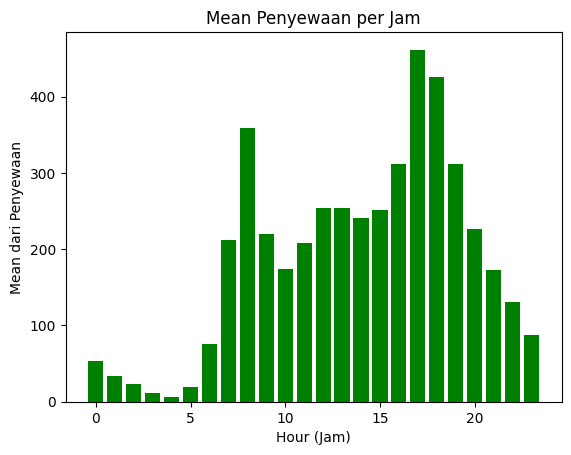

In [ ]:
rental_jam = df_BikeSharing.groupby('hr')['cnt_hour'].mean()

plt.bar(rental_jam.index, rental_jam.values, color='green')

plt.title('Mean Penyewaan per Jam')
plt.xlabel('Hour (Jam)')
plt.ylabel('Mean dari Penyewaan')

plt.show()

#Keterangan:
- Berdasarkan hasil output di atas maka dapat dilihat bahwa nilai mean dari penyewaan sepeda paling banyak terjadi pada saat jam 17 dan 18 atau jam 5 pm dan 6 pm dan yang paling sedikit saat jam 4 am



## Conclusion

- Conclution pertanyaan 1: Pada tahun 2011 jumlah permintaan akan bikesharing memiliki jumlah permintaan tertinggi terjadi pada bulan Juni. Dan pada tahun 2012 jumlah permintaan terhadap bikesharing memiliki jumlah permintaan tertinggi terjadi pada bulan September.

- Conclution pertanyaan 2: Permintaan akan bikeriding relatif rendah pada suhu kurang dari 20 derajat Celcius.Dan permintaan bikeriding relatif tinggi ketika pada suhu 25-30 derajat Celcius.

- Conclution pertanyaan 3: Berdasarkan hasil output di atas maka dapat dilihat bahwa nilai mean dari penyewaan sepeda paling banyak terjadi pada saat jam 17 dan 18 atau jam 5 pm dan 6 pm dan yang paling sedikit saat jam 4 am

